<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-AdrianaCamarillo-A01551139/blob/main/Reduccion_dimensiones_A01551139.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Semanal -- 5 Repaso Transformación y reducción de dimensiones

## Materia: Ciencia y analítica de datos

Profa. María de la Paz

Prof. Roberto Antonio Guevara González

## Nombre: Adriana Camarillo Duran

## Matrícula: A01551139

Fecha de entrega: 27/10/2022

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [1]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B= np.dot(np.dot(W,D),Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [2]:
#Matriz 1
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# Eigendescomposición
values, vectors = eig(A)
print("-------Eigenvalores-------")
print(values) #D
print("-----------------------------")
print("-------Eigenvectores-------")
print(vectors) #W
print("-----------------------------")

#Reconstrucción
values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

print("-------Matriz reconstruida-------")
B= np.dot(np.dot(W,D),Winv)
print(np.around(B))
print("-----------------------------")

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
-------Eigenvalores-------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
-----------------------------
-------Eigenvectores-------
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-----------------------------
-------Matriz reconstruida-------
[[ 3.+0.j  0.-0.j  2.-0.j]
 [ 3.-0.j  0.+0.j -2.+0.j]
 [ 0.+0.j  1.-0.j  1.+0.j]]
-----------------------------


In [3]:
#Matriz 2
A2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
print("-------Matriz original-------")
print(A2)
print("-----------------------------")
# Eigendescomposición
values, vectors = eig(A2)
print("-------Eigenvalores-------")
print(values) #D
print("-----------------------------")
print("-------Eigenvectores-------")
print(vectors) #W
print("-----------------------------")

#Reconstrucción
values, vectors = np.linalg.eig(A2)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

print("-------Matriz reconstruida-------")
B= np.dot(np.dot(W,D),Winv)
print(np.around(B))
print("-----------------------------")

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
-------Eigenvalores-------
[ 3. -2.  1.]
-----------------------------
-------Eigenvectores-------
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-----------------------------
-------Matriz reconstruida-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
-----------------------------


In [4]:
#Matriz 3
A3 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
print("-------Matriz original-------")
print(A3)
print("-----------------------------")
# Eigendescomposición
values, vectors = eig(A3)
print("-------Eigenvalores-------")
print(values) #D
print("-----------------------------")
print("-------Eigenvectores-------")
print(vectors) #W
print("-----------------------------")

#Reconstrucción
values, vectors = np.linalg.eig(A3)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

print("-------Matriz reconstruida-------")
B= np.dot(np.dot(W,D),Winv)
print(np.around(B))
print("-----------------------------")

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
-------Eigenvalores-------
[ 6.89167094 -0.214175   -0.67749594]
-----------------------------
-------Eigenvectores-------
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-----------------------------
-------Matriz reconstruida-------
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]
-----------------------------


Para las 3 matrices, se lograron obtener los eigenvalores y los eigenvectores sin ningún problema y de manera precisa. Esto se puede comprobar al ver que las matrices reconstruidas son iguales a las matrices originales (a excepción de algunos decimales, lo cual se puede esperar).

Cada eigenvector de nuestra matriz representa una combinación lineal de las variables originales. Podríamos usar los primeros con mayor varianza y así reducir nuestra dimensión. 

**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


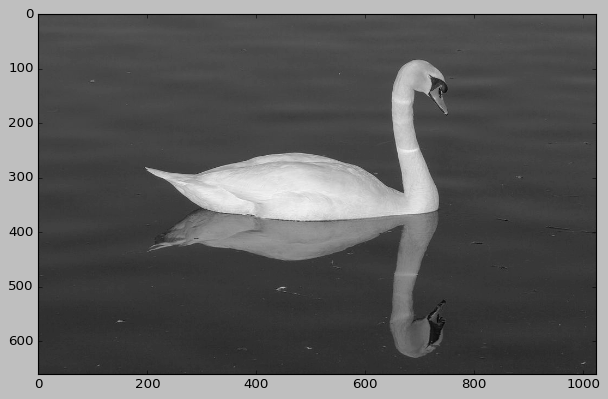

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F48DFF6FC90>


In [5]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [6]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [7]:
U.shape

(660, 660)

In [8]:
V.shape

(1024, 1024)

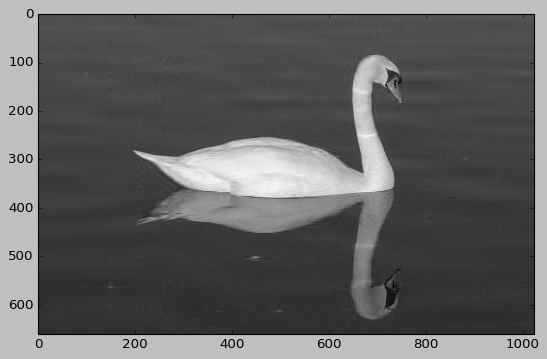

Felicidades la imagen está comprimida


In [11]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue =50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

En el caso de la imagen de Lucy, parece que elegir 50 dimensiones es algo acertado, ya que la calidad de la imagen sigue siendo muy buena a pesar de que ya se redujeron 610 dimensiones. 

Se probó con otros valores como 30 o 40, y aunque la calidad no baja mucho parece parece que vale la pena conservar 50.

¡Ahora es tu turno!, comprime 3 imagenes

Ahora se bajaron 3 imágenes de internet: una palmera, un pastel y un castillo. Se realizará el mismo ejercicio para obtener los componentes principales y reducir las dimensiones. 

[131. 131. 131. ...  73.  70.  68.]


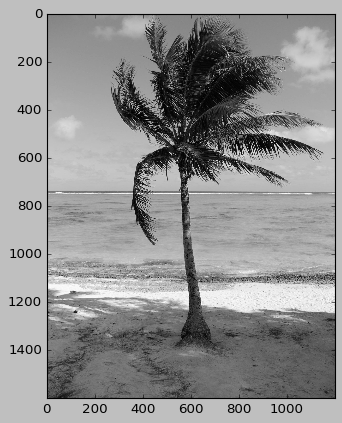

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1200x1600 at 0x7F48E4AD3F10>
(1600, 1200)
(1600, 1600)
(1200, 1200)


In [27]:
#imagen 1
plt.style.use('classic')
img = Image.open('palmera.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

U,D,V = np.linalg.svd(imgmat)
print(imgmat.shape)

print(U.shape)
print(V.shape)

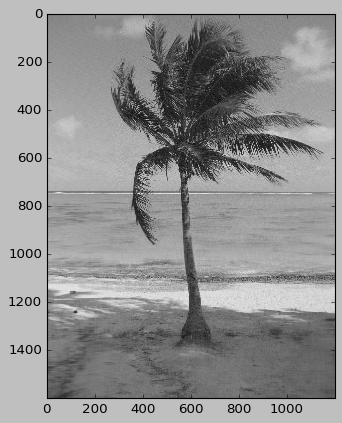

Imagen de palmera comprimida


In [29]:
nvalue =200
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Imagen de palmera comprimida")

En el caso de la palmera, n con valor de 200 sigue conservando una buena calidad de la imagen. Se puede apreciar que los tonos cambian un poco y que es ligeramente más complicado distinguir la textura del agua de la textura de la arena. Sin embargo, logramos reducir 1,400 dimensiones y aún conservar los aspectos más importantes de la imagen.

[100. 100. 100. ... 159. 160. 159.]


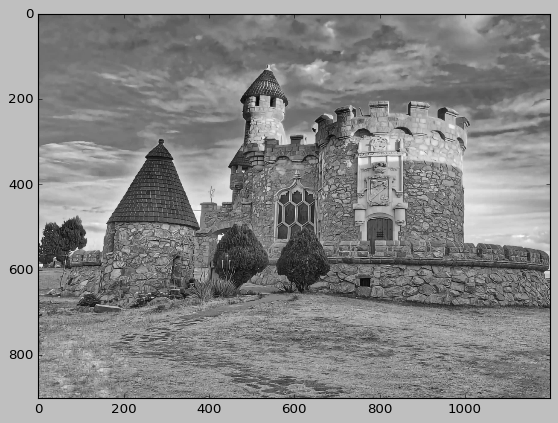

<PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=1200x900 at 0x7F48DC22A7D0>
(900, 1200)
(900, 900)
(1200, 1200)


In [31]:
#imagen 2
plt.style.use('classic')
img = Image.open('castillo.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

U,D,V = np.linalg.svd(imgmat)
print(imgmat.shape)

print(U.shape)
print(V.shape)

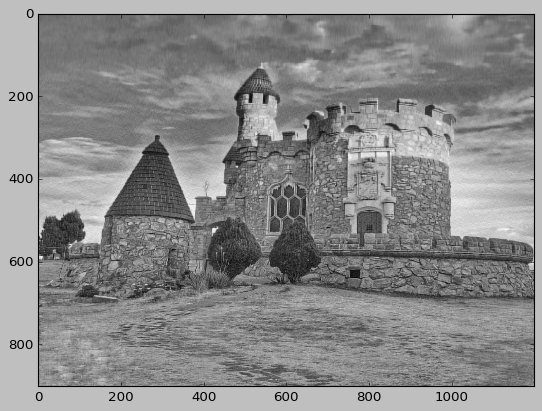

Imagen de castillo comprimida


In [33]:
nvalue = 150
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Imagen de castillo comprimida")

Para el castillo, se encontró que conservar 150 componentes principales es suficiente para mantener una imagen con detalles y buena calidad. La imagen original contenía 900 dimensiones, por lo que hubo una reducción significativa.

[172. 172. 171. ... 130. 127. 125.]


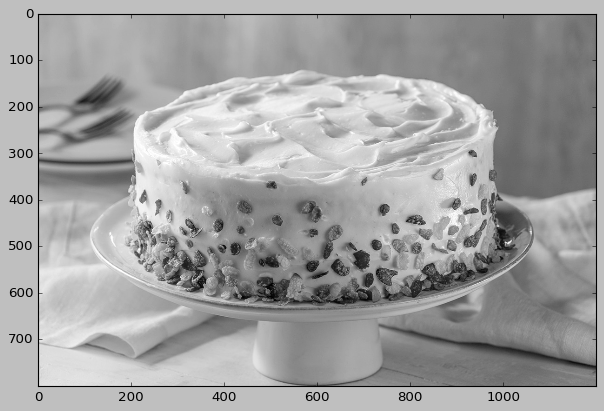

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1200x800 at 0x7F48DB315890>
(800, 1200)
(800, 800)
(1200, 1200)


In [34]:
#imagen 3
plt.style.use('classic')
img = Image.open('pastel.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

U,D,V = np.linalg.svd(imgmat)
print(imgmat.shape)

print(U.shape)
print(V.shape)

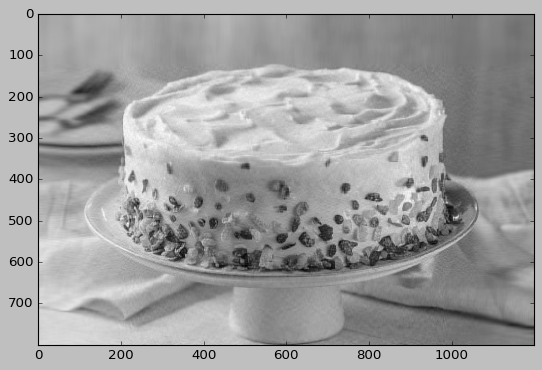

Imagen de pastel comprimida


In [39]:
nvalue = 80
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Imagen de pastel comprimida")

Por último, tenemos la imagen de un pastel. En este caso pasamos de 800 dimensiones originales a tan sólo una décima parte (80). Es claro que la imagen presenta diferencias en cuanto a su calidad; sin embargo, no se pierde mucho la definición de la imagen en comparación con la reducción de dimensiones que se pudo lograr. 

El método de Singular Value Decomposition (SVD) es muy útil para mejor el procesamiento de datos, ya que nos ayuda a obtener las componentes principales sin perder mucha información. El ejercicio 2 es una prueba visual de esto.

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




A partir del dataset iris obtenemos 2 componentes principales, luego estandarizar los datos:

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

Se graficaron los datos antes y después de PCA, diferenciando las categorías o clases de flores por color. 
Podemos observar que con PCA es más fácil dividir los datos incluso aunque fueran del mismo color.

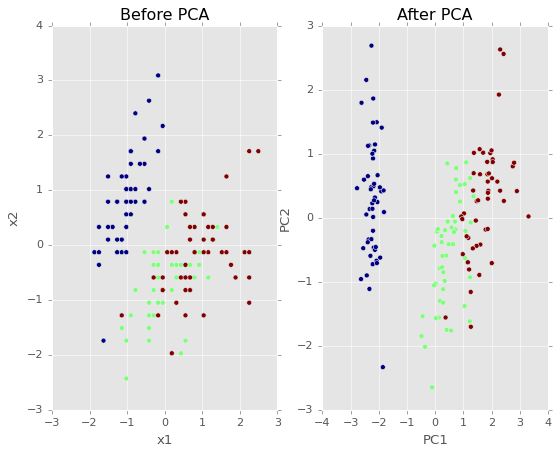

In [41]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

Las dos componentes principales explican en conjunto aproximadamente el 95.8% de la varianza:

In [42]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


Al obtener la matriz de covarianza del espacio reducido con dos componentes principales, podemos ver la prueba de que los eigenvalores de la matriz de covarianza original son iguales a las varianzas del espacio reducido:

In [45]:
np.cov(X_new.T)

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [46]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

Al ver los valores asignados para cada variable en las combinaciones lineales de cada componente, podemos observar qué variables son las más importantes para cada componente.

En este caso, las variables 1, 3 y 4 son más importantes en la componente 1. Mientras que la variable 2 en la más importante en la segunda componente. 

In [47]:
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


Por último, en el ejercicio usamos un biplot para visualizar varios aspectos del análisis de PCA que ya habíamos observado anteriormente. Por ejemplo, podemos ver como las variables 1, 3 y 4 son las más importantes para la primera componente, mientras que la segunda variable es más importante para la segunda componente. 

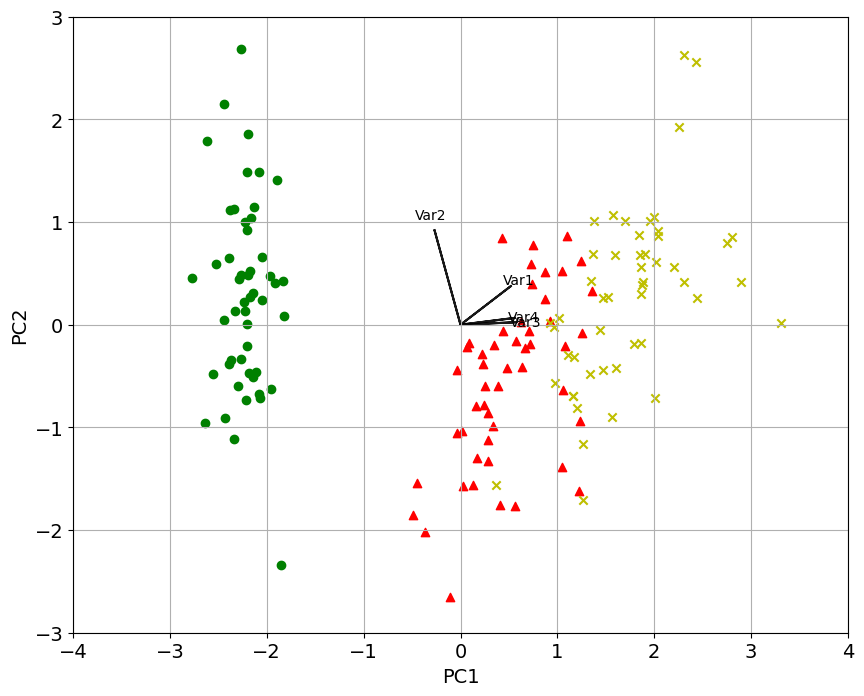

In [48]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()


Otro aspecto importante es que las flechas de las variables 3 y 4 apuntan casi a la misma dirección, mostrando una correlación lineal positiva entre ellas. Mientras que observamos que la 2 y 3 a puntan hacia lados contrarios, indicando una correlación negativa. 

Podemos comprobar lo anterior al calcular la correlación entre esas variables:

In [49]:
# Var 3 and Var 4 are extremely positively correlated
np.corrcoef(X[:,2], X[:,3])[1,0]

0.9628654314027957

In [51]:
# Var 2and Var 3 are negatively correlated
np.corrcoef(X[:,1], X[:,2])[1,0]

-0.42844010433054014

Describe lo relevante del ejercicio y que descubriste de las variables analizadas. 

1) ¿Qué es feature importance y para que nos sirve?

Feature importance se refiere a técnicas para darle un puntaje o peso a las variables de entrada de un modelo con el objetivo de definir las más importantes. Cuando utilizamos el método PCA, transformamos nuestras variables en nuevas variables que son combinaciones lineales de las anteriores, lo cual puede ser muy útil para reducir las dimensiones. Sin embargo, otro enfoque sería revisar qué variables tienen mayor peso en las n componentes principales y quedarnos únicamente con esas sin hacer ninguna transformación. Esto también nos ayudaría a reducir nuestras dimensiones, mientras definimos las variables con mayor importancia a la hora de hacer predicciones. 

2) ¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?

Considero que uno de los puntos más importantes del ejercicio tienen que ver con la capacidad del PCA para encontrar mayor información o varianza con menos variables, y el otro con la importancia de ubicar variables que por sí solas nos den más información.

La última gráfica fue muy útil para hacer un análisis completo y observar las variables que más poder tienen para la construcción del modelo. En este caso, inicialmente teníamos 4 variables, pero pudimos utilizar PCA y reducirlo a sólo 2 componentes principales conservando el 95% de la varianza explicada. 

También nos dimos cuenta que las variables 1, 3, 4 podrían ser las más importantes para el modelo, e incluso que tal vez podríamos eliminar una de esas (la 3 o la 4) ya que están fuertemente correlacionadas.

3)¿Dónde lo aplicarías o te sería de utilidad este conocimiento?

Lo aprendido en este ejercicio sobre PCA podría ser de mucha utilidad cuando se tiene una gran cantidad de variables y no es tan fácil revisar una por una. 

Lo cual es muy común en empresas grandes, donde se tiene mucha información disponible. 